# BANK CUSTOMER CHURN ANALYSIS

### In this project, the primary objective is to conduct a comprehensive analysis of banking customer churn through major data analysis techniques."

# Diagnosis Analysis

In [1]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv("C:\\Users\\HP\\Desktop\\Finalised-PORTFOlLIO\\CUSTOMER CHURN\churn_prediction.csv")


In [2]:
# Overview of the dataset
print(data.head())  # Display the first few rows

   customer_id  vintage  age gender  dependents     occupation    city  \
0            1     2101   66   Male         0.0  self_employed   187.0   
1            2     2348   35   Male         0.0  self_employed     NaN   
2            4     2194   31   Male         0.0       salaried   146.0   
3            5     2329   90    NaN         NaN  self_employed  1020.0   
4            6     1579   42   Male         2.0  self_employed  1494.0   

   customer_nw_category  branch_code  current_balance  ...  \
0                     2          755          1458.71  ...   
1                     2         3214          5390.37  ...   
2                     2           41          3913.16  ...   
3                     2          582          2291.91  ...   
4                     3          388           927.72  ...   

   average_monthly_balance_prevQ  average_monthly_balance_prevQ2  \
0                        1458.71                         1449.07   
1                        7799.26              

In [3]:
print(data.info())  # Display data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     28382 non-null  int64  
 1   vintage                         28382 non-null  int64  
 2   age                             28382 non-null  int64  
 3   gender                          27857 non-null  object 
 4   dependents                      25919 non-null  float64
 5   occupation                      28302 non-null  object 
 6   city                            27579 non-null  float64
 7   customer_nw_category            28382 non-null  int64  
 8   branch_code                     28382 non-null  int64  
 9   current_balance                 28382 non-null  float64
 10  previous_month_end_balance      28382 non-null  float64
 11  average_monthly_balance_prevQ   28382 non-null  float64
 12  average_monthly_balance_prevQ2  

In [4]:
print(data.describe())  # Basic statistics

        customer_id       vintage           age    dependents          city  \
count  28382.000000  28382.000000  28382.000000  25919.000000  27579.000000   
mean   15143.508667   2091.144105     48.208336      0.347236    796.109576   
std     8746.454456    272.676775     17.807163      0.997661    432.872102   
min        1.000000     73.000000      1.000000      0.000000      0.000000   
25%     7557.250000   1958.000000     36.000000      0.000000    409.000000   
50%    15150.500000   2154.000000     46.000000      0.000000    834.000000   
75%    22706.750000   2292.000000     60.000000      0.000000   1096.000000   
max    30301.000000   2476.000000     90.000000     52.000000   1649.000000   

       customer_nw_category   branch_code  current_balance  \
count          28382.000000  28382.000000     2.838200e+04   
mean               2.225530    925.975019     7.380552e+03   
std                0.660443    937.799129     4.259871e+04   
min                1.000000      1.00000

In [5]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
last_transaction                     0
dtype: int64


In [6]:
# Replace null values in the 'dependents' column with 0
data['dependents'] = data['dependents'].fillna(0)


In [7]:
# Replace null values in the 'gender ' column with Not Mentioned 
data['gender'] = data['gender'].fillna('Not Mentioned ')


In [8]:
# Replace null values in the 'occupation  ' column with Not Mentioned 
data['occupation'] = data['occupation'].fillna('Not Mentioned')


In [9]:
# Remove the 'City' column
data = data.drop('city', axis=1)

In [10]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
customer_nw_category              0
branch_code                       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
last_transaction                  0
dtype: int64


In [11]:
# Summary statistics for categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
print(data[categorical_columns].describe())


       gender     occupation last_transaction
count   28382          28382            28382
unique      3              6              361
top      Male  self_employed              NaT
freq    16548          17476             3223


# Diagnostic Analysis

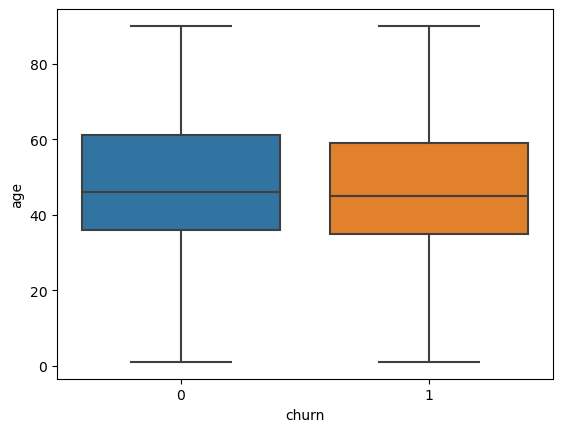

C:\Users\HP\AppData\Local\Temp\ipykernel_29500\647478681.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


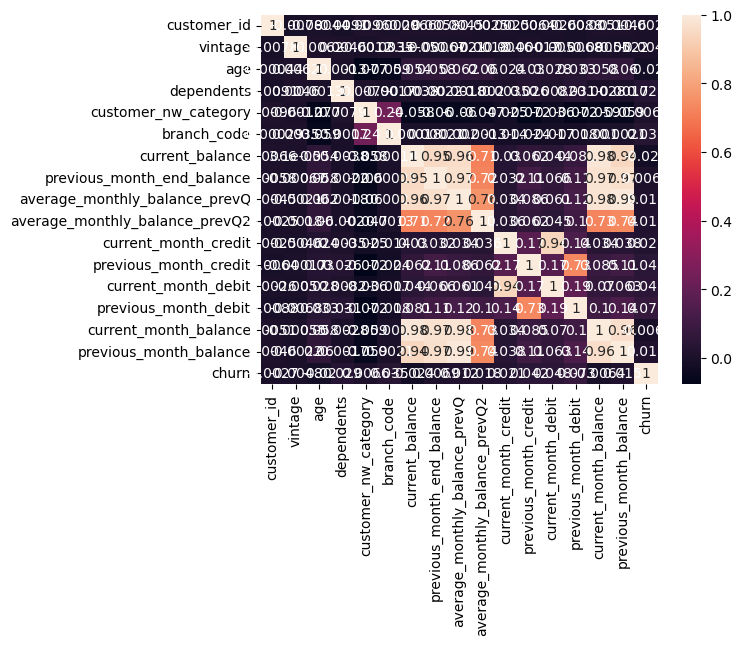

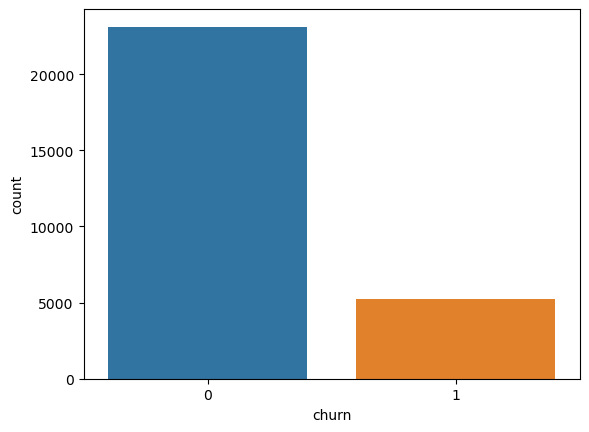

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data visualization
# Example: Relationship between 'age' and 'churn'
sns.boxplot(x='churn', y='age', data=data)
plt.show()

# Correlation matrix to identify relationships
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

# Distribution of 'churn' (target variable)
sns.countplot(x='churn', data=data)
plt.show()


# Predictive Analysis

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Preprocess data and select features
# You may need to encode categorical variables and handle missing values
X = data[['age', 'dependents', 'current_balance', 'previous_month_end_balance']]
y = data['churn']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.8217368328342435
              precision    recall  f1-score   support

           0       0.82      1.00      0.90      4639
           1       0.88      0.03      0.06      1038

    accuracy                           0.82      5677
   macro avg       0.85      0.51      0.48      5677
weighted avg       0.83      0.82      0.75      5677



# Prescriptive Analysis

In [17]:
# Assuming 'model' is already trained
def recommend_actions(customer_data):
    predicted_churn = model.predict([customer_data])
    if predicted_churn == 1:
        return "Recommend taking retention actions."
    else:
        return "No immediate action needed."
# Example usage
customer_data = [30, 2, 5000, 5500]  # Replace with customer data
recommendation = recommend_actions(customer_data)
print(recommendation)


No immediate action needed.


C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
